In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PAÍSES

In [2]:
paises = pd.read_csv('EGOV_DATA_2024.csv')['Country Name'].sort_values(ascending=True).tolist()

TIC

In [3]:
tic = pd.read_excel('ict_in_government.xlsx')

In [4]:
tic = tic[tic['Year'] == 2024]

In [5]:
tic['Soma das Respostas Positivas'] = tic['Indicator_1'] +tic['Indicator_2'] + tic['Indicator_3'] 

In [6]:
tic = tic[tic['Country'].isin(paises)]

In [7]:
tic['Country'] = tic['Country'].sort_values(ascending=True)

In [8]:
tic = tic.iloc[:, [0,1,5]].reset_index(drop=True)

In [9]:
paises = tic['Country'].unique().tolist()

PIB

In [10]:
pib = pd.read_csv('updated_wb_gdp_percapita_ppc.csv')

In [11]:
pib = pib[pib['Country Name'].isin(paises)]

In [12]:
pib['Country Name'] = pib['Country Name'].sort_values(ascending=True).reset_index(drop=True)

In [13]:
pib = pib.melt(
    id_vars='Country Name',
    value_vars='2024',
    var_name='Ano',
    value_name='Produto Interno Bruto'
)

In [14]:
pib = pib.iloc[:, [0, 2]]

In [15]:
pib = pib.rename(columns={
    'Country Name': 'Country'
})

DISPERSÃO

In [16]:
dispersao = pd.DataFrame()
dispersao['Soma das Respostas Positivas'] = tic['Soma das Respostas Positivas']
dispersao ['Produto Interno Bruto'] =  pib['Produto Interno Bruto']

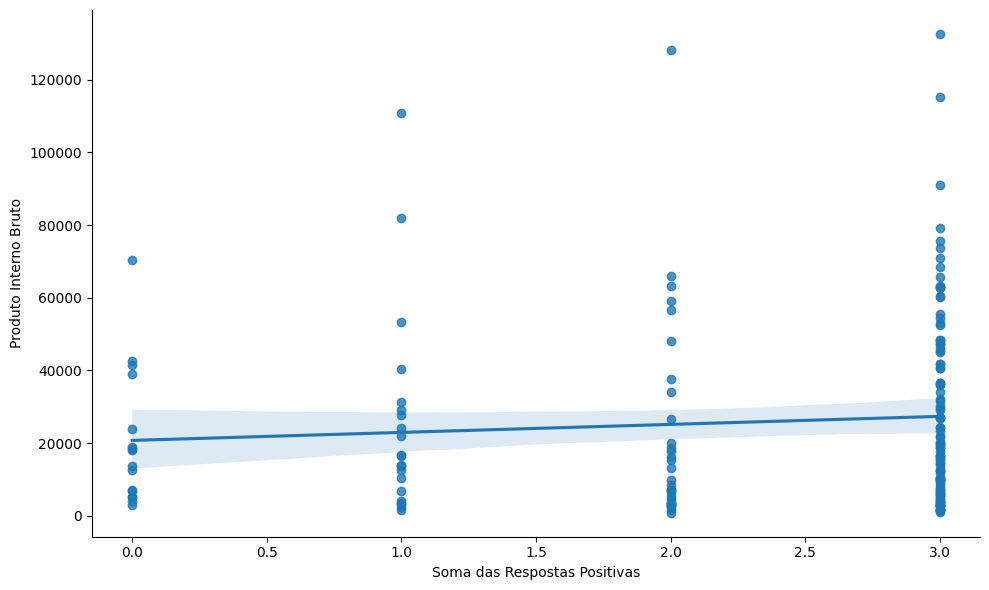

In [17]:
plt.figure(figsize=(10, 6))

sns.regplot(dispersao, x='Soma das Respostas Positivas', y='Produto Interno Bruto')

sns.despine()
plt.tight_layout()
plt.savefig('C:/Users/lazar/Master-Dissertation/figuras/ict_in_government/dispersao_ticegov_pib.png', dpi=300, bbox_inches='tight')
plt.show()